In [16]:
import numpy as np
import random
import time
'''laberinto = np.array([
    [0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 1, 0],
    [0, 0, 0, 1, 0]
])'''
laberinto = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 0, 1, 1, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 1, 1, 1, 0, 1, 0, 1],
    [1, 1, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

'''PUNTO DE INICIO Y FINAL'''
estado_inicial = (1, 1)
estado_objetivo = (8, 8)


# Parámetros de Q-Learning
num_estados = laberinto.shape

num_acciones = 4
alpha = 0.6  # Tasa de aprendizaje
gamma = 0.9  # Factor de descuento
epsilon_inicial = 1.0  # Valor inicial de epsilon
epsilon_minimo = 0.1  # Valor mínimo de epsilon
num_episodios_decaimiento = 50  # epsilon se reduce gradualmente

# Inicializar la tabla de valores Q
Q = np.zeros((num_estados[0], num_estados[1], num_acciones))
#print("Tabla Q inicial:")
#print(Q)
# Función epsilon-greedy para seleccionar acciones
def seleccionar_accion(estado, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(num_acciones))
    else:
        return np.argmax(Q[estado[0], estado[1]])

# Función para mover al agente en el laberinto
def mover_agente(estado, accion):
    if accion == 0:  # Mover hacia arriba
        nuevo_estado = max(estado[0] - 1, 0), estado[1]
    elif accion == 1:  # Mover hacia abajo
        nuevo_estado = min(estado[0] + 1, num_estados[0] - 1), estado[1]
    elif accion == 2:  # Mover a la izquierda
        nuevo_estado = estado[0], max(estado[1] - 1, 0)
    elif accion == 3:  # Mover a la derecha
        nuevo_estado = estado[0], min(estado[1] + 1, num_estados[1] - 1)
    # Si el nuevo estado es una pared, no mover al agente
    if laberinto[nuevo_estado[0], nuevo_estado[1]] == 1:
        return estado
    return nuevo_estado
# Función para imprimir el laberinto
def imprimir_laberinto(estado):
    #clear_output(wait=True)
    laberinto_visual = np.copy(laberinto)
    laberinto_visual[estado[0], estado[1]] = 2  # Marcar la posición actual del agente
    for fila in laberinto_visual:

        print(''.join(['#' if cell == 1 else 'A' if cell == 2 else  ' ' for cell in fila]))
    #time.sleep(0.05)
import matplotlib.pyplot as plt
from IPython.display import clear_output

def dibujar_laberinto(estado):

    laberinto_visual = np.copy(laberinto)
    laberinto_visual[estado[0], estado[1]] = 2  # Marcar la posición actual del agente
    time.sleep(0.4)
    clear_output(wait=True)  # Borra la salida de la celda
    plt.imshow(laberinto_visual, cmap='hot')
    plt.show()

FASE DE ENTRENAMIENTO

In [17]:
num_episodios = 1200
epsilon = epsilon_inicial
for episodio in range(num_episodios):
    estado = estado_inicial

    while estado != estado_objetivo:
        accion = seleccionar_accion(estado, epsilon)
        nueva_estado = mover_agente(estado, accion)
        # Calcular la recompensa
        if laberinto[nueva_estado[0], nueva_estado[1]] == 1:
            recompensa = -100  # Penalización alta

        elif nueva_estado == estado_objetivo:  # Objetivo
            recompensa = 100
        else:
            recompensa = -1

        Q[estado[0], estado[1], accion] += alpha * (recompensa + gamma * np.max(Q[nueva_estado[0], nueva_estado[1]])\
             - Q[estado[0], estado[1], accion])
        estado = nueva_estado

        imprimir_laberinto(estado)  # Imprimir el laberinto en cada paso

    # Decaimiento de epsilon después de cada episodio
    if episodio < num_episodios_decaimiento:
        epsilon -= (epsilon_inicial - epsilon_minimo) / num_episodios_decaimiento
    else:
        epsilon = epsilon_minimo

Se han truncado las últimas 5000 líneas del flujo de salida.
# ## #   #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
##########
# #      #
# # #### #
#   A  ###
# ## #   #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
##########
# #      #
# # #### #
#    A ###
# ## #   #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
##########
# #      #
# # #### #
#     A###
# ## #   #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
##########
# #      #
# # #### #
#      ###
# ## #A  #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
##########
# #      #
# # #### #
#      ###
# ## # A #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
##########
# #      #
# # #### #
#      ###
# ## #  A#
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
##########
# #      #
# # #### #
#      ###
# ## #   #
#  #

TABLE Q- TABLE

In [18]:
#Tabla Q-Table
print(Q)

[[[  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]
  [  0.           0.           0.           0.        ]]

 [[  0.           0.           0.           0.        ]
  [ 15.1644717   17.96052411  15.1644717   15.1644717 ]
  [  0.           0.           0.           0.        ]
  [  2.82035953  21.32088513   2.81762372  -4.36388537]
  [ -4.04063983  -3.99847954  -4.47862715  -4.64822606]
  [ -4.50351666  -4.49806834  -4.06893416  -4.62009923]
  [ -4.51780933  -4.48049703  -4.51679281  -4.14582892]
  [ -4.06618516  -3.68970144  -4.40128315  -3.

IMPRIMIR LA RUTA OPTIMA

In [19]:
# Búsqueda del camino óptimo
estado = estado_inicial
while estado != estado_objetivo:
    accion = seleccionar_accion(estado, epsilon_minimo)
    nueva_estado = mover_agente(estado, accion)
    if laberinto[nueva_estado[0], nueva_estado[1]] != 1:  # Si la nueva celda no es una pared
        print(f"Agente se mueve de {estado} a {nueva_estado} mediante {accion}")
        estado = nueva_estado
        imprimir_laberinto(estado)

    else:
        print(f"Agente intenta moverse de {estado} a {nueva_estado}, pero hay una pared")

Agente se mueve de (1, 1) a (2, 1) mediante 1
##########
# #      #
#A# #### #
#      ###
# ## #   #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
Agente se mueve de (2, 1) a (3, 1) mediante 1
##########
# #      #
# # #### #
#A     ###
# ## #   #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
Agente se mueve de (3, 1) a (3, 2) mediante 3
##########
# #      #
# # #### #
# A    ###
# ## #   #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
Agente se mueve de (3, 2) a (3, 3) mediante 3
##########
# #      #
# # #### #
#  A   ###
# ## #   #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
Agente se mueve de (3, 3) a (3, 4) mediante 3
##########
# #      #
# # #### #
#   A  ###
# ## #   #
#  ### # #
##     # #
### # ## #
##  # #  #
#   ### ##
# #      #
##########
Agente se mueve de (3, 4) a (3, 5) mediante 3
##########
# #      #
# # #### #
#    A ###
# ## #   #
#  ### # 

RUTA OPTIMA GRAFICAMENTE

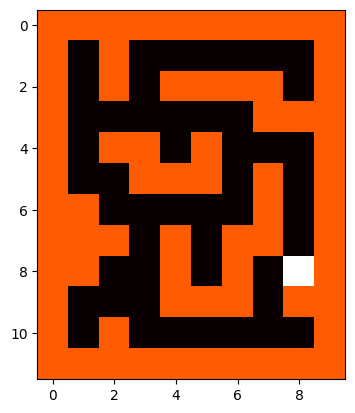

Agente alcanzó el estado objetivo: (8, 8)


In [20]:
# Función para obtener la dirección a partir del número de acción
def obtener_direccion(accion):
    if accion == 0:
        return "arriba"
    elif accion == 1:
        return "abajo"
    elif accion == 2:
        return "izquierda"
    elif accion == 3:
        return "derecha"
    else:
        return "acción desconocida"

# Inicia el bucle while con el estado inicial
estado = estado_inicial
while estado != estado_objetivo:
    accion = seleccionar_accion(estado, epsilon_minimo)
    nueva_estado = mover_agente(estado, accion)
    if laberinto[nueva_estado[0], nueva_estado[1]] != 1:
        dibujar_laberinto(estado)
        direccion = obtener_direccion(accion)
        print(f"Agente se mueve de {estado} a {nueva_estado} {direccion}")
        estado = nueva_estado

    else:
        print(f"Agente intenta moverse de {estado} a {nueva_estado}, pero hay una pared")

# Imprime el último estado (estado_objetivo)
dibujar_laberinto(estado_objetivo)
print(f"Agente alcanzó el estado objetivo: {estado_objetivo}")

RUTA OPTIMA CON OTROS PUNTOS DE ESTADO DE INICIO Y ESTADO FINAL

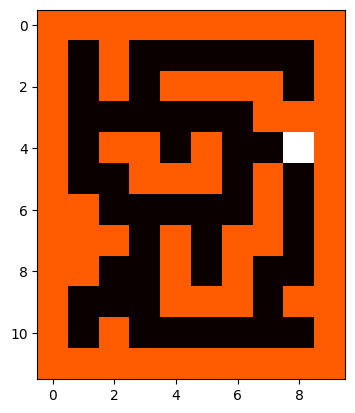

Agente alcanzó el estado objetivo: (4, 8)


In [21]:
# Define tus nuevos puntos de inicio y final
nuevo_estado_inicial = (5, 1)  # Cambia estos valores por tus nuevos puntos de inicio
nuevo_estado_objetivo = (4, 8)  # Cambia estos valores por tus nuevos puntos finales

# Bucle para encontrar la ruta óptima
estado = nuevo_estado_inicial
while estado != nuevo_estado_objetivo:
    accion = np.argmax(Q[estado[0], estado[1]])  # Elige la acción con el valor máximo en la Q-table
    nuevo_estado = mover_agente(estado, accion)
    if laberinto[nuevo_estado[0], nuevo_estado[1]] != 1:
        dibujar_laberinto(estado)  # Visualiza el laberinto con la posición actual del agente
        direccion = obtener_direccion(accion)
        print(f"Agente se mueve de {estado} a {nuevo_estado} {direccion}")
        estado = nuevo_estado
    else:
        print(f"Agente intenta moverse de {estado} a {nuevo_estado}, pero hay una pared")

# Visualiza el estado final
dibujar_laberinto(nuevo_estado_objetivo)
print(f"Agente alcanzó el estado objetivo: {nuevo_estado_objetivo}")
